In [5]:
train_dir= '/Users/alana/Desktop/HonsProj/fer2013+/fer2013plus/fer2013/train'
test_dir= '/Users/alana/Desktop/HonsProj/fer2013+/fer2013plus/fer2013/test'

In [16]:
pip install numpy pandas matplotlib tensorflow opencv-python keras scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 822.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 8.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,GlobalAveragePooling2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Dense
from keras.applications import InceptionV3,DenseNet201,VGG16,VGG19,Xception,ResNet50,DenseNet121
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')

In [10]:
train_datagen= ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    rescale=1./255,
    validation_split=0.2)

val_datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [11]:
train_generator= train_datagen.flow_from_directory(train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=100,
    shuffle=True,
    subset= 'training')
val_generator= val_datagen.flow_from_directory(train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=100,
    shuffle=True,
    subset= 'validation')

Found 22712 images belonging to 8 classes.
Found 5674 images belonging to 8 classes.


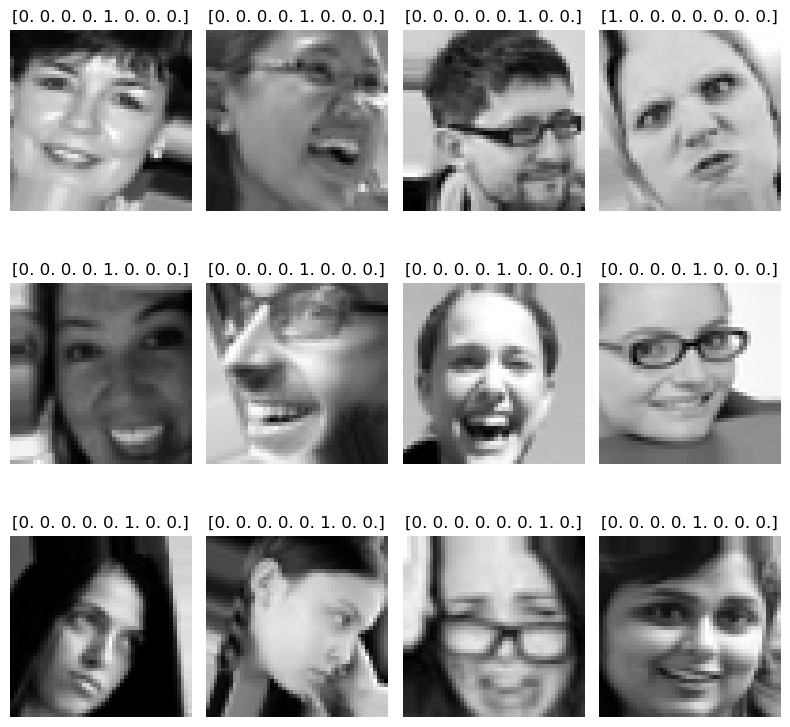

In [13]:
batch_images, batch_labels = train_generator.__next__()  # ✅ Works in TF 2.x
plt.figure(figsize=(8,8))
for i in range (12):
    plt.subplot(3,4,i+1)
    plt.imshow(batch_images[i],cmap='gray') 
    plt.title(batch_labels[i])
    plt.axis('off')  
plt.tight_layout()
plt.show()

In [53]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="same", activation='relu'))



model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 1, 1, 96)       │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 1, 1, 96)       │        83,04

 Total params: 1,442,824 (5.50 MB)

 Trainable params: 1,440,584 (5.50 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [55]:
# lr_schedule= optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001,
#                                                  decay_steps=1000,
#                                                  decay_rate=0.5)

# model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule),loss= 'categorical_crossentropy', metrics=['accuracy'])

In [56]:
# history=model.fit(train_generator,epochs=30,steps_per_epoch=50,verbose=1,validation_data=val_generator)

In [57]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  # ✅ Full model saving
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,  # ✅ Save full model
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=120,
    epochs=300,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.3422 - loss: 1.9009
Epoch 1: val_accuracy improved from -inf to 0.36324, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.3423 - loss: 1.9007 - val_accuracy: 0.3632 - val_loss: 1.8433
Epoch 2/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.3967 - loss: 1.7824
Epoch 2: val_accuracy did not improve from 0.36324
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.3971 - loss: 1.7808 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/300


2025-03-30 13:47:36.637049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:47:36.642953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.4189 - loss: 1.6839
Epoch 3: val_accuracy improved from 0.36324 to 0.45277, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.4190 - loss: 1.6836 - val_accuracy: 0.4528 - val_loss: 1.6270
Epoch 4/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.4375 - loss: 1.6146
Epoch 4: val_accuracy did not improve from 0.45277
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step - accuracy: 0.4385 - loss: 1.6120 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/300


2025-03-30 13:48:46.263336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:48:46.265831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.4800 - loss: 1.5101
Epoch 5: val_accuracy did not improve from 0.45277
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 315ms/step - accuracy: 0.4800 - loss: 1.5100 - val_accuracy: 0.4415 - val_loss: 1.5408
Epoch 6/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.4955 - loss: 1.4553
Epoch 6: val_accuracy did not improve from 0.45277
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.4952 - loss: 1.4548 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/300


2025-03-30 13:49:54.517707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:49:54.519846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5116 - loss: 1.4084
Epoch 7: val_accuracy improved from 0.45277 to 0.51956, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.5115 - loss: 1.4085 - val_accuracy: 0.5196 - val_loss: 1.3532
Epoch 8/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.5089 - loss: 1.4010
Epoch 8: val_accuracy did not improve from 0.51956
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 262ms/step - accuracy: 0.5099 - loss: 1.3991 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/300


2025-03-30 13:51:04.046790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:51:04.049041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5262 - loss: 1.3545
Epoch 9: val_accuracy did not improve from 0.51956
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.5261 - loss: 1.3545 - val_accuracy: 0.5104 - val_loss: 1.4098
Epoch 10/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.5229 - loss: 1.3551
Epoch 10: val_accuracy did not improve from 0.51956
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.5231 - loss: 1.3544 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/300


2025-03-30 13:52:12.241757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:52:12.243965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.5342 - loss: 1.3177
Epoch 11: val_accuracy improved from 0.51956 to 0.58389, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.5343 - loss: 1.3177 - val_accuracy: 0.5839 - val_loss: 1.2179
Epoch 12/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.5556 - loss: 1.2639
Epoch 12: val_accuracy did not improve from 0.58389
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.5554 - loss: 1.2649 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/300


2025-03-30 13:53:23.650774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:53:23.653232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.5473 - loss: 1.2746
Epoch 13: val_accuracy improved from 0.58389 to 0.58513, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.5474 - loss: 1.2745 - val_accuracy: 0.5851 - val_loss: 1.1772
Epoch 14/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.5666 - loss: 1.2439
Epoch 14: val_accuracy did not improve from 0.58513
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.5662 - loss: 1.2437 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/300


2025-03-30 13:54:33.654697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:54:33.656889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.5756 - loss: 1.2079
Epoch 15: val_accuracy improved from 0.58513 to 0.60451, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.5756 - loss: 1.2080 - val_accuracy: 0.6045 - val_loss: 1.1209
Epoch 16/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.5848 - loss: 1.1888
Epoch 16: val_accuracy did not improve from 0.60451
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.5843 - loss: 1.1892 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/300


2025-03-30 13:55:41.876680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:55:41.878885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.5786 - loss: 1.1856
Epoch 17: val_accuracy improved from 0.60451 to 0.63130, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.5787 - loss: 1.1854 - val_accuracy: 0.6313 - val_loss: 1.0571
Epoch 18/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.5867 - loss: 1.1628
Epoch 18: val_accuracy did not improve from 0.63130
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.5867 - loss: 1.1630 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/300


2025-03-30 13:56:49.685197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:56:49.687321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5863 - loss: 1.1512
Epoch 19: val_accuracy improved from 0.63130 to 0.63923, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.5864 - loss: 1.1511 - val_accuracy: 0.6392 - val_loss: 1.0406
Epoch 20/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.6197 - loss: 1.0742
Epoch 20: val_accuracy did not improve from 0.63923
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.6190 - loss: 1.0767 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/300


2025-03-30 13:57:57.202118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:57:57.204374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.6128 - loss: 1.1067
Epoch 21: val_accuracy improved from 0.63923 to 0.66267, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.6128 - loss: 1.1067 - val_accuracy: 0.6627 - val_loss: 0.9806
Epoch 22/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.6135 - loss: 1.0930
Epoch 22: val_accuracy did not improve from 0.66267
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.6139 - loss: 1.0930 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/300


2025-03-30 13:59:04.737087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 13:59:04.739817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6322 - loss: 1.0632
Epoch 23: val_accuracy improved from 0.66267 to 0.67395, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.6321 - loss: 1.0633 - val_accuracy: 0.6740 - val_loss: 0.9409
Epoch 24/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.6253 - loss: 1.0500
Epoch 24: val_accuracy did not improve from 0.67395
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 254ms/step - accuracy: 0.6257 - loss: 1.0506 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/300


2025-03-30 14:00:12.396083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:00:12.398157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6401 - loss: 1.0387
Epoch 25: val_accuracy improved from 0.67395 to 0.67607, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.6401 - loss: 1.0387 - val_accuracy: 0.6761 - val_loss: 0.9269
Epoch 26/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.6450 - loss: 1.0237
Epoch 26: val_accuracy did not improve from 0.67607
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.6448 - loss: 1.0241 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/300


2025-03-30 14:01:20.231804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:01:20.233988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6427 - loss: 1.0076
Epoch 27: val_accuracy improved from 0.67607 to 0.67765, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.6427 - loss: 1.0076 - val_accuracy: 0.6777 - val_loss: 0.9184
Epoch 28/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.6364 - loss: 1.0357
Epoch 28: val_accuracy did not improve from 0.67765
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.6367 - loss: 1.0343 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/300


2025-03-30 14:02:27.837486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:02:27.839641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.6455 - loss: 0.9878
Epoch 29: val_accuracy improved from 0.67765 to 0.69704, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.6455 - loss: 0.9878 - val_accuracy: 0.6970 - val_loss: 0.8753
Epoch 30/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.6582 - loss: 0.9709
Epoch 30: val_accuracy did not improve from 0.69704
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.6582 - loss: 0.9713 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/300


2025-03-30 14:03:35.849532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:03:35.851628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.6641 - loss: 0.9597
Epoch 31: val_accuracy did not improve from 0.69704
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.6641 - loss: 0.9597 - val_accuracy: 0.6930 - val_loss: 0.8854
Epoch 32/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.6628 - loss: 0.9585
Epoch 32: val_accuracy did not improve from 0.69704
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.6630 - loss: 0.9584 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/300


2025-03-30 14:04:43.452050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:04:43.454174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6790 - loss: 0.9361
Epoch 33: val_accuracy improved from 0.69704 to 0.71308, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.6790 - loss: 0.9361 - val_accuracy: 0.7131 - val_loss: 0.8152
Epoch 34/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.6725 - loss: 0.9350
Epoch 34: val_accuracy did not improve from 0.71308
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.6725 - loss: 0.9352 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/300


2025-03-30 14:05:51.343559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:05:51.345684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6846 - loss: 0.9008
Epoch 35: val_accuracy did not improve from 0.71308
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.6846 - loss: 0.9008 - val_accuracy: 0.7081 - val_loss: 0.8244
Epoch 36/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.6866 - loss: 0.9130
Epoch 36: val_accuracy did not improve from 0.71308
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.6864 - loss: 0.9130 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/300


2025-03-30 14:06:59.685457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:06:59.687540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6783 - loss: 0.9142
Epoch 37: val_accuracy improved from 0.71308 to 0.71590, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.6783 - loss: 0.9142 - val_accuracy: 0.7159 - val_loss: 0.8132
Epoch 38/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.6839 - loss: 0.9026
Epoch 38: val_accuracy did not improve from 0.71590
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.6841 - loss: 0.9023 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/300


2025-03-30 14:08:07.640446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:08:07.642572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.6800 - loss: 0.9058
Epoch 39: val_accuracy improved from 0.71590 to 0.72365, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.6801 - loss: 0.9057 - val_accuracy: 0.7237 - val_loss: 0.7935
Epoch 40/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.6992 - loss: 0.8539
Epoch 40: val_accuracy did not improve from 0.72365
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.6988 - loss: 0.8559 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/300


2025-03-30 14:09:15.680129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:09:15.682593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.6898 - loss: 0.8832
Epoch 41: val_accuracy improved from 0.72365 to 0.73229, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.6899 - loss: 0.8831 - val_accuracy: 0.7323 - val_loss: 0.7731
Epoch 42/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.6905 - loss: 0.8821
Epoch 42: val_accuracy did not improve from 0.73229
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.6910 - loss: 0.8812 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/300


2025-03-30 14:10:23.976982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:10:23.979086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6904 - loss: 0.8681
Epoch 43: val_accuracy improved from 0.73229 to 0.73264, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.6905 - loss: 0.8681 - val_accuracy: 0.7326 - val_loss: 0.7748
Epoch 44/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7094 - loss: 0.8473
Epoch 44: val_accuracy did not improve from 0.73264
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7092 - loss: 0.8474 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/300


2025-03-30 14:11:32.028397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:11:32.030475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6986 - loss: 0.8521
Epoch 45: val_accuracy did not improve from 0.73264
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.6986 - loss: 0.8521 - val_accuracy: 0.7302 - val_loss: 0.7871
Epoch 46/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.7103 - loss: 0.8311
Epoch 46: val_accuracy did not improve from 0.73264
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.7100 - loss: 0.8317 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/300


2025-03-30 14:12:40.223010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:12:40.225121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7189 - loss: 0.8125
Epoch 47: val_accuracy improved from 0.73264 to 0.74410, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.7189 - loss: 0.8127 - val_accuracy: 0.7441 - val_loss: 0.7394
Epoch 48/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.7048 - loss: 0.8478
Epoch 48: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.7046 - loss: 0.8476 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/300


2025-03-30 14:13:48.391461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:13:48.393465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7150 - loss: 0.8232
Epoch 49: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.7150 - loss: 0.8232 - val_accuracy: 0.7422 - val_loss: 0.7626
Epoch 50/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.7158 - loss: 0.8076
Epoch 50: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.7159 - loss: 0.8080 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/300


2025-03-30 14:14:56.640405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:14:56.642746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7183 - loss: 0.8083
Epoch 51: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.7183 - loss: 0.8084 - val_accuracy: 0.7296 - val_loss: 0.7774
Epoch 52/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7218 - loss: 0.7978
Epoch 52: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7214 - loss: 0.7989 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/300


2025-03-30 14:16:04.681497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:16:04.683994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.7203 - loss: 0.8051
Epoch 53: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 317ms/step - accuracy: 0.7203 - loss: 0.8050 - val_accuracy: 0.7406 - val_loss: 0.7347
Epoch 54/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.7240 - loss: 0.7792
Epoch 54: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 256ms/step - accuracy: 0.7238 - loss: 0.7793 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/300


2025-03-30 14:17:13.675395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:17:13.677496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7276 - loss: 0.7614
Epoch 55: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.7276 - loss: 0.7615 - val_accuracy: 0.7376 - val_loss: 0.7463
Epoch 56/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7284 - loss: 0.7931
Epoch 56: val_accuracy did not improve from 0.74410
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7285 - loss: 0.7924 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/300


2025-03-30 14:18:21.767056: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:18:21.769348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7267 - loss: 0.7881
Epoch 57: val_accuracy improved from 0.74410 to 0.75679, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.7267 - loss: 0.7881 - val_accuracy: 0.7568 - val_loss: 0.6995
Epoch 58/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.7255 - loss: 0.7674
Epoch 58: val_accuracy did not improve from 0.75679
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 254ms/step - accuracy: 0.7254 - loss: 0.7678 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/300


2025-03-30 14:19:29.781952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:19:29.784135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7369 - loss: 0.7617
Epoch 59: val_accuracy did not improve from 0.75679
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 315ms/step - accuracy: 0.7369 - loss: 0.7617 - val_accuracy: 0.7519 - val_loss: 0.7061
Epoch 60/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7363 - loss: 0.7557
Epoch 60: val_accuracy did not improve from 0.75679
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7359 - loss: 0.7569 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/300


2025-03-30 14:20:37.994613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:20:37.996845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.7290 - loss: 0.7748
Epoch 61: val_accuracy did not improve from 0.75679
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 315ms/step - accuracy: 0.7291 - loss: 0.7747 - val_accuracy: 0.7543 - val_loss: 0.7052
Epoch 62/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7314 - loss: 0.7483
Epoch 62: val_accuracy did not improve from 0.75679
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.7315 - loss: 0.7494 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/300


2025-03-30 14:21:46.068555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:21:46.070655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7449 - loss: 0.7306
Epoch 63: val_accuracy did not improve from 0.75679
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.7449 - loss: 0.7308 - val_accuracy: 0.7550 - val_loss: 0.7124
Epoch 64/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.7410 - loss: 0.7336
Epoch 64: val_accuracy did not improve from 0.75679
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.7407 - loss: 0.7338 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/300


2025-03-30 14:22:54.153538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:22:54.155598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7407 - loss: 0.7308
Epoch 65: val_accuracy improved from 0.75679 to 0.75855, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.7407 - loss: 0.7309 - val_accuracy: 0.7585 - val_loss: 0.6830
Epoch 66/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7455 - loss: 0.7304
Epoch 66: val_accuracy did not improve from 0.75855
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.7449 - loss: 0.7319 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/300


2025-03-30 14:24:02.411379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:24:02.414034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7461 - loss: 0.7283
Epoch 67: val_accuracy did not improve from 0.75855
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.7461 - loss: 0.7283 - val_accuracy: 0.7543 - val_loss: 0.7100
Epoch 68/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7490 - loss: 0.7154
Epoch 68: val_accuracy did not improve from 0.75855
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.7490 - loss: 0.7154 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/300


2025-03-30 14:25:10.423010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:25:10.425188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7568 - loss: 0.7048
Epoch 69: val_accuracy improved from 0.75855 to 0.76384, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 315ms/step - accuracy: 0.7567 - loss: 0.7049 - val_accuracy: 0.7638 - val_loss: 0.6861
Epoch 70/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.7512 - loss: 0.7061
Epoch 70: val_accuracy did not improve from 0.76384
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.7510 - loss: 0.7064 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/300


2025-03-30 14:26:18.973714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:26:18.976067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7603 - loss: 0.7008
Epoch 71: val_accuracy did not improve from 0.76384
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 315ms/step - accuracy: 0.7603 - loss: 0.7008 - val_accuracy: 0.7626 - val_loss: 0.6873
Epoch 72/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.7602 - loss: 0.6891
Epoch 72: val_accuracy did not improve from 0.76384
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.7600 - loss: 0.6901 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/300


2025-03-30 14:27:27.633621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:27:27.635702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7502 - loss: 0.7193
Epoch 73: val_accuracy improved from 0.76384 to 0.76983, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.7502 - loss: 0.7192 - val_accuracy: 0.7698 - val_loss: 0.6629
Epoch 74/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7519 - loss: 0.7148
Epoch 74: val_accuracy did not improve from 0.76983
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7525 - loss: 0.7125 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/300


2025-03-30 14:28:35.710696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:28:35.712787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7510 - loss: 0.7086
Epoch 75: val_accuracy improved from 0.76983 to 0.77476, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.7510 - loss: 0.7086 - val_accuracy: 0.7748 - val_loss: 0.6677
Epoch 76/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.7541 - loss: 0.7035
Epoch 76: val_accuracy did not improve from 0.77476
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.7543 - loss: 0.7030 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/300


2025-03-30 14:29:44.042162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:29:44.044257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7537 - loss: 0.7028
Epoch 77: val_accuracy did not improve from 0.77476
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.7537 - loss: 0.7028 - val_accuracy: 0.7698 - val_loss: 0.6674
Epoch 78/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.7578 - loss: 0.6807
Epoch 78: val_accuracy did not improve from 0.77476
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.7580 - loss: 0.6806 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/300


2025-03-30 14:30:52.254616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:30:52.256739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7592 - loss: 0.6884
Epoch 79: val_accuracy improved from 0.77476 to 0.77723, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.7592 - loss: 0.6884 - val_accuracy: 0.7772 - val_loss: 0.6351
Epoch 80/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.7753 - loss: 0.6637
Epoch 80: val_accuracy did not improve from 0.77723
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.7745 - loss: 0.6647 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/300


2025-03-30 14:32:00.993363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:32:00.995480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7616 - loss: 0.6842
Epoch 81: val_accuracy did not improve from 0.77723
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.7617 - loss: 0.6841 - val_accuracy: 0.7755 - val_loss: 0.6459
Epoch 82/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.7715 - loss: 0.6579
Epoch 82: val_accuracy did not improve from 0.77723
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 254ms/step - accuracy: 0.7709 - loss: 0.6587 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/300


2025-03-30 14:33:09.085993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:33:09.088201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7707 - loss: 0.6667
Epoch 83: val_accuracy did not improve from 0.77723
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.7707 - loss: 0.6667 - val_accuracy: 0.7741 - val_loss: 0.6468
Epoch 84/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7701 - loss: 0.6450
Epoch 84: val_accuracy did not improve from 0.77723
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.7703 - loss: 0.6458 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/300


2025-03-30 14:34:16.719385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:34:16.721520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7602 - loss: 0.6787
Epoch 85: val_accuracy did not improve from 0.77723
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.7603 - loss: 0.6785 - val_accuracy: 0.7760 - val_loss: 0.6596
Epoch 86/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7797 - loss: 0.6498
Epoch 86: val_accuracy did not improve from 0.77723
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7794 - loss: 0.6496 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/300


2025-03-30 14:35:24.465650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:35:24.467770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7741 - loss: 0.6453
Epoch 87: val_accuracy improved from 0.77723 to 0.78023, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.7741 - loss: 0.6454 - val_accuracy: 0.7802 - val_loss: 0.6421
Epoch 88/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7654 - loss: 0.6740
Epoch 88: val_accuracy did not improve from 0.78023
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.7660 - loss: 0.6726 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/300


2025-03-30 14:36:32.377795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:36:32.379944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.7726 - loss: 0.6593
Epoch 89: val_accuracy did not improve from 0.78023
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.7725 - loss: 0.6594 - val_accuracy: 0.7637 - val_loss: 0.6590
Epoch 90/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.7689 - loss: 0.6613
Epoch 90: val_accuracy did not improve from 0.78023
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.7687 - loss: 0.6610 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/300


2025-03-30 14:37:40.251058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:37:40.253106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7844 - loss: 0.6305
Epoch 91: val_accuracy did not improve from 0.78023
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.7844 - loss: 0.6306 - val_accuracy: 0.7721 - val_loss: 0.6666
Epoch 92/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7737 - loss: 0.6279
Epoch 92: val_accuracy did not improve from 0.78023
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7742 - loss: 0.6281 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/300


2025-03-30 14:38:47.866396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:38:47.868469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7731 - loss: 0.6440
Epoch 93: val_accuracy did not improve from 0.78023
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.7732 - loss: 0.6439 - val_accuracy: 0.7640 - val_loss: 0.6717
Epoch 94/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.7855 - loss: 0.6071
Epoch 94: val_accuracy did not improve from 0.78023
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.7850 - loss: 0.6081 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/300


2025-03-30 14:39:55.676059: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:39:55.678179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.7790 - loss: 0.6159
Epoch 95: val_accuracy improved from 0.78023 to 0.78164, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.7790 - loss: 0.6159 - val_accuracy: 0.7816 - val_loss: 0.6420
Epoch 96/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7816 - loss: 0.6433
Epoch 96: val_accuracy did not improve from 0.78164
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.7815 - loss: 0.6423 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/300


2025-03-30 14:41:03.192706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:41:03.194806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.7769 - loss: 0.6225
Epoch 97: val_accuracy did not improve from 0.78164
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.7769 - loss: 0.6225 - val_accuracy: 0.7808 - val_loss: 0.6414
Epoch 98/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.7832 - loss: 0.6167
Epoch 98: val_accuracy did not improve from 0.78164
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 254ms/step - accuracy: 0.7832 - loss: 0.6164 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/300


2025-03-30 14:42:10.649116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:42:10.651199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.7847 - loss: 0.6247
Epoch 99: val_accuracy did not improve from 0.78164
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.7847 - loss: 0.6247 - val_accuracy: 0.7774 - val_loss: 0.6463
Epoch 100/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7892 - loss: 0.6055
Epoch 100: val_accuracy did not improve from 0.78164
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.7893 - loss: 0.6054 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 101/300


2025-03-30 14:43:17.891216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:43:17.893884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.7795 - loss: 0.6163
Epoch 101: val_accuracy improved from 0.78164 to 0.79045, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.7796 - loss: 0.6163 - val_accuracy: 0.7904 - val_loss: 0.6136
Epoch 102/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7867 - loss: 0.6046
Epoch 102: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7868 - loss: 0.6049 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 103/300


2025-03-30 14:44:25.514658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:44:25.516786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7879 - loss: 0.6042
Epoch 103: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.7879 - loss: 0.6042 - val_accuracy: 0.7785 - val_loss: 0.6506
Epoch 104/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7933 - loss: 0.5915
Epoch 104: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.7930 - loss: 0.5925 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 105/300


2025-03-30 14:45:33.235865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:45:33.237992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7904 - loss: 0.6011
Epoch 105: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.7904 - loss: 0.6011 - val_accuracy: 0.7711 - val_loss: 0.6536
Epoch 106/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7840 - loss: 0.6066
Epoch 106: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7843 - loss: 0.6062 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 107/300


2025-03-30 14:46:41.003055: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:46:41.005116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7975 - loss: 0.5730
Epoch 107: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.7974 - loss: 0.5731 - val_accuracy: 0.7763 - val_loss: 0.6592
Epoch 108/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7837 - loss: 0.6051
Epoch 108: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.7841 - loss: 0.6047 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 109/300


2025-03-30 14:47:48.588152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:47:48.590209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7931 - loss: 0.5988
Epoch 109: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.7931 - loss: 0.5987 - val_accuracy: 0.7723 - val_loss: 0.6719
Epoch 110/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.7900 - loss: 0.5925
Epoch 110: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.7900 - loss: 0.5927 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 111/300


2025-03-30 14:48:56.291203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:48:56.293292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7990 - loss: 0.5781
Epoch 111: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.7990 - loss: 0.5781 - val_accuracy: 0.7862 - val_loss: 0.6259
Epoch 112/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7993 - loss: 0.5724
Epoch 112: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.7988 - loss: 0.5735 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 113/300


2025-03-30 14:50:03.947403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:50:03.949464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8004 - loss: 0.5771
Epoch 113: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.8004 - loss: 0.5771 - val_accuracy: 0.7864 - val_loss: 0.6243
Epoch 114/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.8036 - loss: 0.5636
Epoch 114: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.8036 - loss: 0.5632 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 115/300


2025-03-30 14:51:12.206905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:51:12.208980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8092 - loss: 0.5485
Epoch 115: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8091 - loss: 0.5486 - val_accuracy: 0.7839 - val_loss: 0.6135
Epoch 116/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7908 - loss: 0.5765
Epoch 116: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.7910 - loss: 0.5767 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 117/300


2025-03-30 14:52:19.554569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:52:19.556664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.7968 - loss: 0.5755
Epoch 117: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.7968 - loss: 0.5755 - val_accuracy: 0.7769 - val_loss: 0.6533
Epoch 118/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7977 - loss: 0.5717
Epoch 118: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.7980 - loss: 0.5708 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 119/300


2025-03-30 14:53:27.001082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:53:27.003287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8004 - loss: 0.5662
Epoch 119: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8004 - loss: 0.5662 - val_accuracy: 0.7811 - val_loss: 0.6330
Epoch 120/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.7969 - loss: 0.5620
Epoch 120: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.7975 - loss: 0.5617 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 121/300


2025-03-30 14:54:34.563413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:54:34.565546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8155 - loss: 0.5384
Epoch 121: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8154 - loss: 0.5385 - val_accuracy: 0.7843 - val_loss: 0.6363
Epoch 122/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.8080 - loss: 0.5565
Epoch 122: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8073 - loss: 0.5579 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 123/300


2025-03-30 14:55:41.990888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:55:41.993044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8073 - loss: 0.5434
Epoch 123: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.8073 - loss: 0.5435 - val_accuracy: 0.7778 - val_loss: 0.6454
Epoch 124/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8079 - loss: 0.5504
Epoch 124: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8080 - loss: 0.5500 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 125/300


2025-03-30 14:56:49.887452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:56:49.889508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8044 - loss: 0.5663
Epoch 125: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8044 - loss: 0.5663 - val_accuracy: 0.7867 - val_loss: 0.6188
Epoch 126/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8039 - loss: 0.5611
Epoch 126: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8043 - loss: 0.5601 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 127/300


2025-03-30 14:57:57.226528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:57:57.229305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8070 - loss: 0.5575
Epoch 127: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8070 - loss: 0.5574 - val_accuracy: 0.7899 - val_loss: 0.6216
Epoch 128/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8103 - loss: 0.5314
Epoch 128: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8102 - loss: 0.5318 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 129/300
  1/120 ━━━━━━━━━━━━━━━━━━━━ 22s 191ms/step - accuracy: 0.7500 - loss: 0.7476

2025-03-30 14:59:04.655850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 14:59:04.658019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8133 - loss: 0.5295
Epoch 129: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.8133 - loss: 0.5296 - val_accuracy: 0.7867 - val_loss: 0.6271
Epoch 130/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8156 - loss: 0.5358
Epoch 130: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8152 - loss: 0.5358 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 131/300


2025-03-30 15:00:12.054892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:00:12.056996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8048 - loss: 0.5411
Epoch 131: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.8048 - loss: 0.5411 - val_accuracy: 0.7875 - val_loss: 0.6139
Epoch 132/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8213 - loss: 0.5184
Epoch 132: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8210 - loss: 0.5189 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 133/300


2025-03-30 15:01:19.707952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:01:19.710093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8137 - loss: 0.5379
Epoch 133: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8137 - loss: 0.5380 - val_accuracy: 0.7889 - val_loss: 0.6107
Epoch 134/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8201 - loss: 0.5255
Epoch 134: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8200 - loss: 0.5253 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 135/300


2025-03-30 15:02:27.097060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:02:27.099206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8153 - loss: 0.5346
Epoch 135: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8153 - loss: 0.5345 - val_accuracy: 0.7875 - val_loss: 0.6154
Epoch 136/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8151 - loss: 0.5223
Epoch 136: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8149 - loss: 0.5224 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 137/300


2025-03-30 15:03:34.444097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:03:34.446186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8140 - loss: 0.5204
Epoch 137: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8140 - loss: 0.5205 - val_accuracy: 0.7890 - val_loss: 0.6329
Epoch 138/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8216 - loss: 0.5195
Epoch 138: val_accuracy did not improve from 0.79045
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8212 - loss: 0.5202 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 139/300


2025-03-30 15:04:41.629771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:04:41.632031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8232 - loss: 0.5115
Epoch 139: val_accuracy improved from 0.79045 to 0.79309, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8232 - loss: 0.5116 - val_accuracy: 0.7931 - val_loss: 0.6187
Epoch 140/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8188 - loss: 0.5127
Epoch 140: val_accuracy did not improve from 0.79309
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8186 - loss: 0.5133 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 141/300


2025-03-30 15:05:48.772143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:05:48.774229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8149 - loss: 0.5141
Epoch 141: val_accuracy did not improve from 0.79309
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.8149 - loss: 0.5141 - val_accuracy: 0.7859 - val_loss: 0.6251
Epoch 142/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8193 - loss: 0.5089
Epoch 142: val_accuracy did not improve from 0.79309
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8197 - loss: 0.5083 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 143/300


2025-03-30 15:06:56.519237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:06:56.521899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8221 - loss: 0.5121
Epoch 143: val_accuracy did not improve from 0.79309
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.8221 - loss: 0.5121 - val_accuracy: 0.7912 - val_loss: 0.6183
Epoch 144/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8238 - loss: 0.4971
Epoch 144: val_accuracy did not improve from 0.79309
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8236 - loss: 0.4977 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 145/300


2025-03-30 15:08:04.302521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:08:04.304670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8253 - loss: 0.5045
Epoch 145: val_accuracy did not improve from 0.79309
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8253 - loss: 0.5045 - val_accuracy: 0.7926 - val_loss: 0.6135
Epoch 146/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.8177 - loss: 0.5017
Epoch 146: val_accuracy did not improve from 0.79309
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 254ms/step - accuracy: 0.8179 - loss: 0.5022 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 147/300


2025-03-30 15:09:12.092386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:09:12.094480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8341 - loss: 0.4859
Epoch 147: val_accuracy improved from 0.79309 to 0.80032, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.8340 - loss: 0.4859 - val_accuracy: 0.8003 - val_loss: 0.6147
Epoch 148/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8229 - loss: 0.5022
Epoch 148: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8222 - loss: 0.5041 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 149/300


2025-03-30 15:10:19.856534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:10:19.859291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8293 - loss: 0.4845
Epoch 149: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.8292 - loss: 0.4846 - val_accuracy: 0.7954 - val_loss: 0.6113
Epoch 150/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.8231 - loss: 0.5036
Epoch 150: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8232 - loss: 0.5033 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 151/300


2025-03-30 15:11:27.808086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:11:27.810240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8260 - loss: 0.4917
Epoch 151: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8260 - loss: 0.4917 - val_accuracy: 0.7913 - val_loss: 0.6288
Epoch 152/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8258 - loss: 0.4881
Epoch 152: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8259 - loss: 0.4885 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 153/300


2025-03-30 15:12:35.628478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:12:35.630598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8398 - loss: 0.4775
Epoch 153: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8398 - loss: 0.4775 - val_accuracy: 0.7871 - val_loss: 0.6443
Epoch 154/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8334 - loss: 0.4811
Epoch 154: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8328 - loss: 0.4817 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 155/300


2025-03-30 15:13:43.059590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:13:43.061672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8281 - loss: 0.4866
Epoch 155: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.8281 - loss: 0.4866 - val_accuracy: 0.7899 - val_loss: 0.6333
Epoch 156/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8233 - loss: 0.4945
Epoch 156: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8234 - loss: 0.4944 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 157/300


2025-03-30 15:14:50.741928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:14:50.744050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8370 - loss: 0.4600
Epoch 157: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.8370 - loss: 0.4600 - val_accuracy: 0.7956 - val_loss: 0.6204
Epoch 158/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8377 - loss: 0.4660
Epoch 158: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8375 - loss: 0.4655 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 159/300


2025-03-30 15:15:58.080398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:15:58.082452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8314 - loss: 0.4784
Epoch 159: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8314 - loss: 0.4786 - val_accuracy: 0.7838 - val_loss: 0.6397
Epoch 160/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8315 - loss: 0.4859
Epoch 160: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8313 - loss: 0.4857 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 161/300


2025-03-30 15:17:05.793101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:17:05.795191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8326 - loss: 0.4676
Epoch 161: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8326 - loss: 0.4676 - val_accuracy: 0.7894 - val_loss: 0.6437
Epoch 162/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8382 - loss: 0.4522
Epoch 162: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8379 - loss: 0.4543 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 163/300


2025-03-30 15:18:13.018165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:18:13.020255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8313 - loss: 0.4777
Epoch 163: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8313 - loss: 0.4777 - val_accuracy: 0.7959 - val_loss: 0.6132
Epoch 164/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8336 - loss: 0.4674
Epoch 164: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8336 - loss: 0.4677 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 165/300


2025-03-30 15:19:20.600475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:19:20.602588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8282 - loss: 0.4905
Epoch 165: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8282 - loss: 0.4904 - val_accuracy: 0.7952 - val_loss: 0.6229
Epoch 166/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8440 - loss: 0.4395
Epoch 166: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8435 - loss: 0.4408 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 167/300


2025-03-30 15:20:27.995888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:20:27.997988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8361 - loss: 0.4689
Epoch 167: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8361 - loss: 0.4689 - val_accuracy: 0.7875 - val_loss: 0.6447
Epoch 168/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8385 - loss: 0.4574
Epoch 168: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8388 - loss: 0.4569 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 169/300


2025-03-30 15:21:35.380529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:21:35.382612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8372 - loss: 0.4652
Epoch 169: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8373 - loss: 0.4651 - val_accuracy: 0.7950 - val_loss: 0.6193
Epoch 170/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8345 - loss: 0.4755
Epoch 170: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8348 - loss: 0.4741 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 171/300


2025-03-30 15:22:43.018684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:22:43.020777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8362 - loss: 0.4602
Epoch 171: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8362 - loss: 0.4602 - val_accuracy: 0.8003 - val_loss: 0.6190
Epoch 172/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8450 - loss: 0.4387
Epoch 172: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8451 - loss: 0.4390 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 173/300


2025-03-30 15:23:50.457359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:23:50.460430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8444 - loss: 0.4459
Epoch 173: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8443 - loss: 0.4460 - val_accuracy: 0.7910 - val_loss: 0.6456
Epoch 174/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8474 - loss: 0.4362
Epoch 174: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8475 - loss: 0.4360 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 175/300


2025-03-30 15:24:57.720052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:24:57.722339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8458 - loss: 0.4419
Epoch 175: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8458 - loss: 0.4420 - val_accuracy: 0.7897 - val_loss: 0.6323
Epoch 176/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8375 - loss: 0.4460
Epoch 176: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8380 - loss: 0.4457 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 177/300


2025-03-30 15:26:04.922193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:26:04.924296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8390 - loss: 0.4470
Epoch 177: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8391 - loss: 0.4471 - val_accuracy: 0.7889 - val_loss: 0.6533
Epoch 178/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8438 - loss: 0.4624
Epoch 178: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8439 - loss: 0.4609 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 179/300


2025-03-30 15:27:12.296935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:27:12.299001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8532 - loss: 0.4226
Epoch 179: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8531 - loss: 0.4227 - val_accuracy: 0.7882 - val_loss: 0.6538
Epoch 180/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8404 - loss: 0.4398
Epoch 180: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8405 - loss: 0.4402 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 181/300


2025-03-30 15:28:19.560589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:28:19.563202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8434 - loss: 0.4405
Epoch 181: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.8435 - loss: 0.4404 - val_accuracy: 0.7998 - val_loss: 0.6310
Epoch 182/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8446 - loss: 0.4338
Epoch 182: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8446 - loss: 0.4336 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 183/300


2025-03-30 15:29:26.998464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:29:27.000590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8465 - loss: 0.4284
Epoch 183: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8465 - loss: 0.4285 - val_accuracy: 0.7917 - val_loss: 0.6421
Epoch 184/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8445 - loss: 0.4384
Epoch 184: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8448 - loss: 0.4381 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 185/300


2025-03-30 15:30:34.553844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:30:34.556430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8417 - loss: 0.4348
Epoch 185: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8417 - loss: 0.4347 - val_accuracy: 0.7986 - val_loss: 0.6148
Epoch 186/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8488 - loss: 0.4193
Epoch 186: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8490 - loss: 0.4195 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 187/300


2025-03-30 15:31:41.772414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:31:41.774502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8537 - loss: 0.4230
Epoch 187: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8537 - loss: 0.4230 - val_accuracy: 0.7945 - val_loss: 0.6442
Epoch 188/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8524 - loss: 0.4275
Epoch 188: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8526 - loss: 0.4265 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 189/300


2025-03-30 15:32:49.080764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:32:49.082842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8504 - loss: 0.4267
Epoch 189: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8503 - loss: 0.4268 - val_accuracy: 0.7876 - val_loss: 0.6523
Epoch 190/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8439 - loss: 0.4399
Epoch 190: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8445 - loss: 0.4385 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 191/300


2025-03-30 15:33:56.198683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:33:56.201588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8605 - loss: 0.4087
Epoch 191: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8604 - loss: 0.4087 - val_accuracy: 0.7975 - val_loss: 0.6384
Epoch 192/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.8508 - loss: 0.4158
Epoch 192: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 248ms/step - accuracy: 0.8509 - loss: 0.4159 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 193/300


2025-03-30 15:35:03.327547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:35:03.329679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8546 - loss: 0.4226
Epoch 193: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8545 - loss: 0.4226 - val_accuracy: 0.7966 - val_loss: 0.6232
Epoch 194/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8586 - loss: 0.3933
Epoch 194: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8582 - loss: 0.3949 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 195/300


2025-03-30 15:36:10.464399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:36:10.466592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8586 - loss: 0.4054
Epoch 195: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8586 - loss: 0.4055 - val_accuracy: 0.7899 - val_loss: 0.6599
Epoch 196/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8458 - loss: 0.4337
Epoch 196: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8465 - loss: 0.4316 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 197/300


2025-03-30 15:37:17.625229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:37:17.627342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8606 - loss: 0.4005
Epoch 197: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8606 - loss: 0.4006 - val_accuracy: 0.7945 - val_loss: 0.6530
Epoch 198/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8507 - loss: 0.4151
Epoch 198: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8509 - loss: 0.4145 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 199/300


2025-03-30 15:38:24.857800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:38:24.859899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8511 - loss: 0.4205
Epoch 199: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8512 - loss: 0.4204 - val_accuracy: 0.7876 - val_loss: 0.6490
Epoch 200/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8570 - loss: 0.3935
Epoch 200: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8566 - loss: 0.3947 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 201/300


2025-03-30 15:39:31.990658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:39:31.992719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8594 - loss: 0.3863
Epoch 201: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8594 - loss: 0.3864 - val_accuracy: 0.7987 - val_loss: 0.6434
Epoch 202/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8645 - loss: 0.3928
Epoch 202: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8642 - loss: 0.3935 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 203/300


2025-03-30 15:40:39.349380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:40:39.351501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8580 - loss: 0.4000
Epoch 203: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8580 - loss: 0.4000 - val_accuracy: 0.7959 - val_loss: 0.6510
Epoch 204/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8558 - loss: 0.4064
Epoch 204: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8561 - loss: 0.4062 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 205/300


2025-03-30 15:41:46.849618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:41:46.851713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8694 - loss: 0.3739
Epoch 205: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8694 - loss: 0.3741 - val_accuracy: 0.7975 - val_loss: 0.6396
Epoch 206/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8567 - loss: 0.3953
Epoch 206: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8571 - loss: 0.3947 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 207/300


2025-03-30 15:42:54.506346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:42:54.508409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8524 - loss: 0.4186
Epoch 207: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8524 - loss: 0.4185 - val_accuracy: 0.7913 - val_loss: 0.6634
Epoch 208/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8620 - loss: 0.3881
Epoch 208: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8618 - loss: 0.3884 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 209/300


2025-03-30 15:44:02.247117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:44:02.249215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8640 - loss: 0.3893
Epoch 209: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.8640 - loss: 0.3893 - val_accuracy: 0.7991 - val_loss: 0.6441
Epoch 210/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8674 - loss: 0.3736
Epoch 210: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8669 - loss: 0.3750 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 211/300


2025-03-30 15:45:09.718429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:45:09.720607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8635 - loss: 0.3842
Epoch 211: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.8635 - loss: 0.3842 - val_accuracy: 0.7959 - val_loss: 0.6601
Epoch 212/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8655 - loss: 0.3921
Epoch 212: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8653 - loss: 0.3920 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 213/300


2025-03-30 15:46:17.316289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:46:17.318436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8646 - loss: 0.3846
Epoch 213: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8646 - loss: 0.3846 - val_accuracy: 0.7986 - val_loss: 0.6408
Epoch 214/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8629 - loss: 0.3859
Epoch 214: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8634 - loss: 0.3853 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 215/300


2025-03-30 15:47:24.679373: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:47:24.681464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8638 - loss: 0.3712
Epoch 215: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.8638 - loss: 0.3712 - val_accuracy: 0.7957 - val_loss: 0.6537
Epoch 216/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8610 - loss: 0.4002
Epoch 216: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8608 - loss: 0.4002 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 217/300


2025-03-30 15:48:32.264549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:48:32.266644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8689 - loss: 0.3713
Epoch 217: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8688 - loss: 0.3715 - val_accuracy: 0.7920 - val_loss: 0.6444
Epoch 218/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8613 - loss: 0.4023
Epoch 218: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8617 - loss: 0.4012 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 219/300


2025-03-30 15:49:39.829936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:49:39.831993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8697 - loss: 0.3732
Epoch 219: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.8696 - loss: 0.3733 - val_accuracy: 0.7947 - val_loss: 0.6439
Epoch 220/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8767 - loss: 0.3591
Epoch 220: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8763 - loss: 0.3602 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 221/300


2025-03-30 15:50:47.465949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:50:47.468274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8660 - loss: 0.3829
Epoch 221: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.8660 - loss: 0.3830 - val_accuracy: 0.7926 - val_loss: 0.6704
Epoch 222/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8683 - loss: 0.3655
Epoch 222: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8685 - loss: 0.3652 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 223/300


2025-03-30 15:51:55.079339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:51:55.081457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8747 - loss: 0.3621
Epoch 223: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8747 - loss: 0.3622 - val_accuracy: 0.7936 - val_loss: 0.6696
Epoch 224/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.8655 - loss: 0.3631
Epoch 224: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 254ms/step - accuracy: 0.8658 - loss: 0.3634 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 225/300


2025-03-30 15:53:02.883465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:53:02.885546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8631 - loss: 0.3870
Epoch 225: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.8631 - loss: 0.3869 - val_accuracy: 0.7971 - val_loss: 0.6412
Epoch 226/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.8723 - loss: 0.3537
Epoch 226: val_accuracy did not improve from 0.80032
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.8725 - loss: 0.3539 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 227/300


2025-03-30 15:54:11.008396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:54:11.010517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.8655 - loss: 0.3721
Epoch 227: val_accuracy improved from 0.80032 to 0.80067, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.8655 - loss: 0.3721 - val_accuracy: 0.8007 - val_loss: 0.6546
Epoch 228/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8598 - loss: 0.3981
Epoch 228: val_accuracy did not improve from 0.80067
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8603 - loss: 0.3963 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 229/300


2025-03-30 15:55:18.940586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:55:18.943345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8715 - loss: 0.3664
Epoch 229: val_accuracy did not improve from 0.80067
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.8715 - loss: 0.3664 - val_accuracy: 0.7989 - val_loss: 0.6513
Epoch 230/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8691 - loss: 0.3639
Epoch 230: val_accuracy did not improve from 0.80067
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8693 - loss: 0.3639 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 231/300


2025-03-30 15:56:26.710405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:56:26.712507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8699 - loss: 0.3658
Epoch 231: val_accuracy improved from 0.80067 to 0.80208, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8698 - loss: 0.3658 - val_accuracy: 0.8021 - val_loss: 0.6374
Epoch 232/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8718 - loss: 0.3612
Epoch 232: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8720 - loss: 0.3613 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 233/300


2025-03-30 15:57:34.345685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:57:34.348606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8761 - loss: 0.3539
Epoch 233: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8760 - loss: 0.3540 - val_accuracy: 0.7940 - val_loss: 0.6827
Epoch 234/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8635 - loss: 0.3762
Epoch 234: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8640 - loss: 0.3750 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 235/300


2025-03-30 15:58:41.557124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:58:41.559186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8864 - loss: 0.3321
Epoch 235: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.8864 - loss: 0.3322 - val_accuracy: 0.7919 - val_loss: 0.6975
Epoch 236/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8748 - loss: 0.3661
Epoch 236: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8748 - loss: 0.3661 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 237/300


2025-03-30 15:59:49.238481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 15:59:49.240611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8751 - loss: 0.3539
Epoch 237: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.8751 - loss: 0.3539 - val_accuracy: 0.7903 - val_loss: 0.6978
Epoch 238/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8805 - loss: 0.3458
Epoch 238: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8801 - loss: 0.3466 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 239/300


2025-03-30 16:00:57.182075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:00:57.184517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8709 - loss: 0.3634
Epoch 239: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8709 - loss: 0.3634 - val_accuracy: 0.7940 - val_loss: 0.6847
Epoch 240/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8821 - loss: 0.3453
Epoch 240: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8814 - loss: 0.3461 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 241/300


2025-03-30 16:02:04.880852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:02:04.882994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8738 - loss: 0.3499
Epoch 241: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8738 - loss: 0.3499 - val_accuracy: 0.7941 - val_loss: 0.6666
Epoch 242/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8708 - loss: 0.3591
Epoch 242: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8710 - loss: 0.3580 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 243/300


2025-03-30 16:03:12.673637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:03:12.675697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8779 - loss: 0.3408
Epoch 243: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8779 - loss: 0.3408 - val_accuracy: 0.7913 - val_loss: 0.6877
Epoch 244/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8745 - loss: 0.3678
Epoch 244: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8743 - loss: 0.3666 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 245/300


2025-03-30 16:04:20.341911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:04:20.344064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8801 - loss: 0.3362
Epoch 245: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.8801 - loss: 0.3362 - val_accuracy: 0.7931 - val_loss: 0.6782
Epoch 246/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8780 - loss: 0.3328
Epoch 246: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8777 - loss: 0.3339 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 247/300


2025-03-30 16:05:28.118301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:05:28.120498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8739 - loss: 0.3532
Epoch 247: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8739 - loss: 0.3533 - val_accuracy: 0.7922 - val_loss: 0.6639
Epoch 248/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.8803 - loss: 0.3469
Epoch 248: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 275ms/step - accuracy: 0.8803 - loss: 0.3462 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 249/300


2025-03-30 16:06:38.560389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:06:38.563058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.8893 - loss: 0.3178
Epoch 249: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 327ms/step - accuracy: 0.8893 - loss: 0.3179 - val_accuracy: 0.8005 - val_loss: 0.6597
Epoch 250/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8807 - loss: 0.3454
Epoch 250: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8803 - loss: 0.3458 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 251/300


2025-03-30 16:07:48.145229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:07:48.147458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8778 - loss: 0.3355
Epoch 251: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8778 - loss: 0.3355 - val_accuracy: 0.7943 - val_loss: 0.6735
Epoch 252/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8812 - loss: 0.3388
Epoch 252: val_accuracy did not improve from 0.80208
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8806 - loss: 0.3401 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 253/300


2025-03-30 16:08:55.629085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:08:55.631312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8842 - loss: 0.3227
Epoch 253: val_accuracy improved from 0.80208 to 0.80243, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.8842 - loss: 0.3228 - val_accuracy: 0.8024 - val_loss: 0.6467
Epoch 254/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8905 - loss: 0.3176
Epoch 254: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8900 - loss: 0.3183 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 255/300


2025-03-30 16:10:02.992048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:10:02.994175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8798 - loss: 0.3334
Epoch 255: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.8798 - loss: 0.3334 - val_accuracy: 0.8005 - val_loss: 0.6606
Epoch 256/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8778 - loss: 0.3468
Epoch 256: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8779 - loss: 0.3464 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 257/300


2025-03-30 16:11:10.451481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:11:10.453715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8856 - loss: 0.3193
Epoch 257: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8856 - loss: 0.3193 - val_accuracy: 0.7931 - val_loss: 0.7154
Epoch 258/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8829 - loss: 0.3295
Epoch 258: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8825 - loss: 0.3303 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 259/300


2025-03-30 16:12:17.632303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:12:17.634409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8823 - loss: 0.3218
Epoch 259: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8823 - loss: 0.3219 - val_accuracy: 0.7922 - val_loss: 0.6709
Epoch 260/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8808 - loss: 0.3262
Epoch 260: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8805 - loss: 0.3268 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 261/300


2025-03-30 16:13:25.010483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:13:25.012635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8897 - loss: 0.3178
Epoch 261: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8897 - loss: 0.3178 - val_accuracy: 0.8019 - val_loss: 0.6757
Epoch 262/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8846 - loss: 0.3340
Epoch 262: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8849 - loss: 0.3331 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 263/300


2025-03-30 16:14:32.205296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:14:32.207917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8871 - loss: 0.3156
Epoch 263: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8871 - loss: 0.3156 - val_accuracy: 0.8010 - val_loss: 0.6895
Epoch 264/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8842 - loss: 0.3291
Epoch 264: val_accuracy did not improve from 0.80243
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8840 - loss: 0.3296 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 265/300


2025-03-30 16:15:39.419742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:15:39.422001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8899 - loss: 0.3184
Epoch 265: val_accuracy improved from 0.80243 to 0.80331, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8899 - loss: 0.3185 - val_accuracy: 0.8033 - val_loss: 0.6590
Epoch 266/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8826 - loss: 0.3386
Epoch 266: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8825 - loss: 0.3382 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 267/300


2025-03-30 16:16:46.843504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:16:46.845635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8804 - loss: 0.3320
Epoch 267: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - accuracy: 0.8804 - loss: 0.3321 - val_accuracy: 0.8005 - val_loss: 0.6824
Epoch 268/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8903 - loss: 0.3127
Epoch 268: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8902 - loss: 0.3130 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 269/300


2025-03-30 16:17:54.421345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:17:54.423997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8876 - loss: 0.3152
Epoch 269: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 324ms/step - accuracy: 0.8876 - loss: 0.3152 - val_accuracy: 0.8007 - val_loss: 0.6632
Epoch 270/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8869 - loss: 0.3186
Epoch 270: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.8869 - loss: 0.3193 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 271/300


2025-03-30 16:19:03.796815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:19:03.799057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8846 - loss: 0.3163
Epoch 271: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8846 - loss: 0.3164 - val_accuracy: 0.7941 - val_loss: 0.6818
Epoch 272/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8913 - loss: 0.3062
Epoch 272: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8908 - loss: 0.3072 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 273/300


2025-03-30 16:20:11.111797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:20:11.113893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8890 - loss: 0.2996
Epoch 273: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8890 - loss: 0.2997 - val_accuracy: 0.7959 - val_loss: 0.6816
Epoch 274/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8891 - loss: 0.3176
Epoch 274: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8891 - loss: 0.3172 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 275/300


2025-03-30 16:21:18.183239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:21:18.185346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8853 - loss: 0.3202
Epoch 275: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.8853 - loss: 0.3203 - val_accuracy: 0.8033 - val_loss: 0.6971
Epoch 276/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.8946 - loss: 0.3040
Epoch 276: val_accuracy did not improve from 0.80331
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 248ms/step - accuracy: 0.8943 - loss: 0.3047 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 277/300


2025-03-30 16:22:24.874226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:22:24.876338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9011 - loss: 0.2853
Epoch 277: val_accuracy improved from 0.80331 to 0.80384, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.9011 - loss: 0.2854 - val_accuracy: 0.8038 - val_loss: 0.6851
Epoch 278/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.8866 - loss: 0.3315
Epoch 278: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 247ms/step - accuracy: 0.8869 - loss: 0.3300 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 279/300


2025-03-30 16:23:31.626889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:23:31.628979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8934 - loss: 0.3033
Epoch 279: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8933 - loss: 0.3034 - val_accuracy: 0.7929 - val_loss: 0.6926
Epoch 280/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.8886 - loss: 0.3032
Epoch 280: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 247ms/step - accuracy: 0.8889 - loss: 0.3031 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 281/300


2025-03-30 16:24:38.472636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:24:38.474711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8944 - loss: 0.3120
Epoch 281: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.8944 - loss: 0.3121 - val_accuracy: 0.7934 - val_loss: 0.6805
Epoch 282/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8818 - loss: 0.3223
Epoch 282: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8821 - loss: 0.3217 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 283/300


2025-03-30 16:25:45.247618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:25:45.249764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8944 - loss: 0.2999
Epoch 283: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8944 - loss: 0.2999 - val_accuracy: 0.8021 - val_loss: 0.6899
Epoch 284/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.8907 - loss: 0.3096
Epoch 284: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 246ms/step - accuracy: 0.8907 - loss: 0.3095 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 285/300


2025-03-30 16:26:51.892469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:26:51.894584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8878 - loss: 0.3030
Epoch 285: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 305ms/step - accuracy: 0.8878 - loss: 0.3030 - val_accuracy: 0.7996 - val_loss: 0.6824
Epoch 286/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8853 - loss: 0.3176
Epoch 286: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8858 - loss: 0.3167 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 287/300


2025-03-30 16:27:58.677662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:27:58.679728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8992 - loss: 0.2899
Epoch 287: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 309ms/step - accuracy: 0.8992 - loss: 0.2900 - val_accuracy: 0.7970 - val_loss: 0.6875
Epoch 288/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.8905 - loss: 0.3069
Epoch 288: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 247ms/step - accuracy: 0.8906 - loss: 0.3069 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 289/300


2025-03-30 16:29:05.554396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:29:05.556583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8881 - loss: 0.3071
Epoch 289: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.8881 - loss: 0.3071 - val_accuracy: 0.7977 - val_loss: 0.7073
Epoch 290/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.8897 - loss: 0.3052
Epoch 290: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 248ms/step - accuracy: 0.8898 - loss: 0.3046 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 291/300


2025-03-30 16:30:12.181877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:30:12.183973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8985 - loss: 0.2890
Epoch 291: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.8985 - loss: 0.2890 - val_accuracy: 0.8008 - val_loss: 0.6918
Epoch 292/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8944 - loss: 0.2966
Epoch 292: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8944 - loss: 0.2972 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 293/300


2025-03-30 16:31:18.982881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:31:18.985869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8898 - loss: 0.3083
Epoch 293: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8899 - loss: 0.3082 - val_accuracy: 0.7922 - val_loss: 0.7270
Epoch 294/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8950 - loss: 0.3061
Epoch 294: val_accuracy did not improve from 0.80384
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8953 - loss: 0.3048 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 295/300


2025-03-30 16:32:25.928021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:32:25.930317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8996 - loss: 0.2885
Epoch 295: val_accuracy improved from 0.80384 to 0.80543, saving model to best_model.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - accuracy: 0.8996 - loss: 0.2886 - val_accuracy: 0.8054 - val_loss: 0.6968
Epoch 296/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.8992 - loss: 0.2798
Epoch 296: val_accuracy did not improve from 0.80543
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.8987 - loss: 0.2812 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 297/300


2025-03-30 16:33:32.816455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:33:32.818516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8907 - loss: 0.3184
Epoch 297: val_accuracy did not improve from 0.80543
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 308ms/step - accuracy: 0.8908 - loss: 0.3184 - val_accuracy: 0.7994 - val_loss: 0.6834
Epoch 298/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8936 - loss: 0.3107
Epoch 298: val_accuracy did not improve from 0.80543
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8937 - loss: 0.3100 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 299/300


2025-03-30 16:34:40.078143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:34:40.080252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8965 - loss: 0.2890
Epoch 299: val_accuracy did not improve from 0.80543
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.8965 - loss: 0.2890 - val_accuracy: 0.8016 - val_loss: 0.6954
Epoch 300/300
108/120 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8925 - loss: 0.2946
Epoch 300: val_accuracy did not improve from 0.80543
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.8930 - loss: 0.2935 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2025-03-30 16:35:46.990937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-30 16:35:46.993088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [17]:
#Repeat
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_model.keras')

from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  # ✅ Full model saving
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,  # ✅ Save full model
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9054 - loss: 0.2703
Epoch 1: val_accuracy improved from -inf to 0.80190, saving model to best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - accuracy: 0.9054 - loss: 0.2702 - val_accuracy: 0.8019 - val_loss: 0.6899
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9093 - loss: 0.2574
Epoch 2: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.9093 - loss: 0.2575 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


2025-04-01 12:39:29.525939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 28/100 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.9029 - loss: 0.2842

2025-04-01 12:39:37.798676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 3: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.9059 - loss: 0.2751 - val_accuracy: 0.7963 - val_loss: 0.7031
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9075 - loss: 0.2622
Epoch 4: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 294ms/step - accuracy: 0.9074 - loss: 0.2623 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20


2025-04-01 12:40:11.205160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9009 - loss: 0.2759
Epoch 5: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.9010 - loss: 0.2758 - val_accuracy: 0.7961 - val_loss: 0.7240
Epoch 6/20
 28/100 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - accuracy: 0.8924 - loss: 0.2919
Epoch 6: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8979 - loss: 0.2801 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20


2025-04-01 12:40:52.625159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-01 12:40:52.627032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9084 - loss: 0.2535
Epoch 7: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 327ms/step - accuracy: 0.9084 - loss: 0.2536 - val_accuracy: 0.7853 - val_loss: 0.7539
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9058 - loss: 0.2613
Epoch 8: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.9057 - loss: 0.2614 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20


2025-04-01 12:41:54.011983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 28/100 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - accuracy: 0.9060 - loss: 0.2655

2025-04-01 12:42:02.190438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 9: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.9081 - loss: 0.2626 - val_accuracy: 0.7915 - val_loss: 0.7422
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9074 - loss: 0.2599
Epoch 10: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 295ms/step - accuracy: 0.9074 - loss: 0.2600 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/20


2025-04-01 12:42:35.793105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9077 - loss: 0.2667
Epoch 11: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.9077 - loss: 0.2667 - val_accuracy: 0.7991 - val_loss: 0.7099
Epoch 12/20
 28/100 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.8993 - loss: 0.2559
Epoch 12: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9016 - loss: 0.2583 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/20


2025-04-01 12:43:16.207351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-01 12:43:16.209131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9033 - loss: 0.2708
Epoch 13: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - accuracy: 0.9033 - loss: 0.2707 - val_accuracy: 0.7941 - val_loss: 0.7256
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9098 - loss: 0.2497
Epoch 14: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.9098 - loss: 0.2497 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/20


2025-04-01 12:44:17.467101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 28/100 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.9069 - loss: 0.2475

2025-04-01 12:44:25.374073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 15: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.9104 - loss: 0.2466 - val_accuracy: 0.7978 - val_loss: 0.7384
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9184 - loss: 0.2480
Epoch 16: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accuracy: 0.9183 - loss: 0.2482 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/20


2025-04-01 12:44:58.104074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9061 - loss: 0.2706
Epoch 17: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 320ms/step - accuracy: 0.9061 - loss: 0.2706 - val_accuracy: 0.7959 - val_loss: 0.7551
Epoch 18/20
 28/100 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.9068 - loss: 0.2830
Epoch 18: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9040 - loss: 0.2871 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/20


2025-04-01 12:45:37.956553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-01 12:45:37.958342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9068 - loss: 0.2543
Epoch 19: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.9068 - loss: 0.2542 - val_accuracy: 0.7912 - val_loss: 0.7428
Epoch 20/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9113 - loss: 0.2478
Epoch 20: val_accuracy did not improve from 0.80190
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.9113 - loss: 0.2479 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2025-04-01 12:46:38.934375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [6]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_generator= test_datagen.flow_from_directory(test_dir, 
                                                 target_size=(48,48),
                                                 color_mode='grayscale',
                                                 class_mode='categorical',
                                                 batch_size=32,
                                                 shuffle=True)

Found 7099 images belonging to 8 classes.


In [ ]:
import os
full_path = os.path.abspath("best_model.keras")
print(full_path)

/Users/alana/Downloads/best_model.keras


In [ ]:
model.load_weights(filepath='/Users/alana/Downloads/best_model.keras')

# Use evaluate() instead of evaluate_generator()
model.evaluate(test_generator, verbose=1)

222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7991 - loss: 0.6037


[0.6027649641036987, 0.7967319488525391]

In [ ]:
model.save('fer2013plus.h5')

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('fer2013plus.h5')

# Define emotion labels
emotion_labels = ["Anger", "Contempt", "Disgust", "Fear", "Happiness", "Neutral", "Sadness", "Surprise"]

# Load the Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start the video capture
cap = cv2.VideoCapture(0)  # Use 0 for the default camera, you may need to change it based on your setup

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # If faces are detected, process each face
    for (x, y, w, h) in faces:
        # Crop the face region
        face_roi = gray_frame[y:y + h, x:x + w]
        # Resize the face region to 48x48 pixels
        resized_face = cv2.resize(face_roi, (48, 48))
        
        # Normalize pixel values to be in the range [0, 1]
        normalized_face = resized_face / 255.0

        # Add a batch dimension and channel dimension to the face
        processed_face = np.expand_dims(np.expand_dims(normalized_face, axis=-1), axis=0)

        # Make predictions using the model
        predictions = model.predict(processed_face)
        
        # Draw a rectangle around the face and display the predicted emotion
        predicted_emotion_index = np.argmax(predictions)
        predicted_emotion = emotion_labels[predicted_emotion_index]

        # Draw a rectangle around the face and display the predicted emotion
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Emotion Detection', frame)
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'fer2013plus.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
import cv2
import numpy as np
import tkinter as tk
from keras.models import load_model
from PIL import Image, ImageTk

# Load the trained model
model = load_model('fer2013plus.h5')

# Define emotion labels and corresponding emojis
emotion_labels = ["Anger", "Contempt", "Disgust", "Fear", "Happiness", "Neutral", "Sadness", "Surprise"]
emoji_map = {
    "Anger": "😠", "Contempt": "😒", "Disgust": "🤢", "Fear": "😨",
    "Happiness": "😃", "Neutral": "😐", "Sadness": "😢", "Surprise": "😲"
}

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Tkinter GUI setup
root = tk.Tk()
root.title("Emotion Detection")
root.geometry("800x600")
root.minsize(400, 300)  # Minimum window size

# Frame for video feed
frame_video = tk.Frame(root)
frame_video.pack(fill=tk.BOTH, expand=True)

# Label to display video feed
label_video = tk.Label(frame_video, width=640, height=480)  # Set default width & height
label_video.pack(fill=tk.BOTH, expand=True)

# Label to display detected emotion
label_text = tk.Label(root, text="Detected Emotion: ", font=("Arial Unicode MS", 20))
label_text.pack()

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("⚠️ Error: Camera not detected. Check your webcam.")
    exit()

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

def detect_emotion():
    """Detects face, predicts emotion, and updates the Tkinter GUI."""
    ret, frame = cap.read()
    if not ret:
        print("⚠️ Error: Unable to read from camera. Check webcam.")
        root.after(1000, detect_emotion)  # Retry after 1 second
        return

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    detected_emotion = "Neutral"
    
    for (x, y, w, h) in faces:
        face_roi = gray_frame[y:y + h, x:x + w]
        resized_face = cv2.resize(face_roi, (48, 48))  # Resize to match model input
        normalized_face = resized_face / 255.0  # Normalize pixel values
        processed_face = np.expand_dims(normalized_face, axis=(0, -1))  # Add batch and channel dimensions

        predictions = model.predict(processed_face)
        predicted_emotion_index = np.argmax(predictions)
        detected_emotion = emotion_labels[predicted_emotion_index]
        
        # Draw rectangle and emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, detected_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Convert frame to display in Tkinter
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame)
    imgtk = ImageTk.PhotoImage(image=img)
    
    # Ensure the image updates correctly
    label_video.configure(image=imgtk)
    label_video.image = imgtk  # Fix garbage collection issue
    
    # Update emotion label
    label_text.configure(
        text=f"Detected Emotion: {detected_emotion} {emoji_map.get(detected_emotion, '')}",
        font=("Arial Unicode MS", 40)
    )
    
    root.after(10, detect_emotion)  # Refresh video feed

def on_closing():
    """Handles GUI closing event without crashing."""
    print("Closing application... Releasing camera.")
    cap.release()
    cv2.destroyAllWindows()
    root.destroy()

# Event bindings
root.protocol("WM_DELETE_WINDOW", on_closing)
root.after(10, detect_emotion)
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 